# Regression Model Exploration: ElasticNet on Cars Dataset

This notebook explores the **ElasticNet** regression model using the `cars.csv` dataset from Selva Prabhakaran's repository.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 1. Load Dataset


In [2]:
df = pd.read_csv('/content/cars.csv')
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


## 2. Exploratory Data Analysis (EDA)


In [3]:
print("--- Dataset Info ---")
print(df.info())
print("\n--- Descriptive Statistics ---")
display(df.describe())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   50 non-null     int64
 1   dist    50 non-null     int64
dtypes: int64(2)
memory usage: 932.0 bytes
None

--- Descriptive Statistics ---


,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


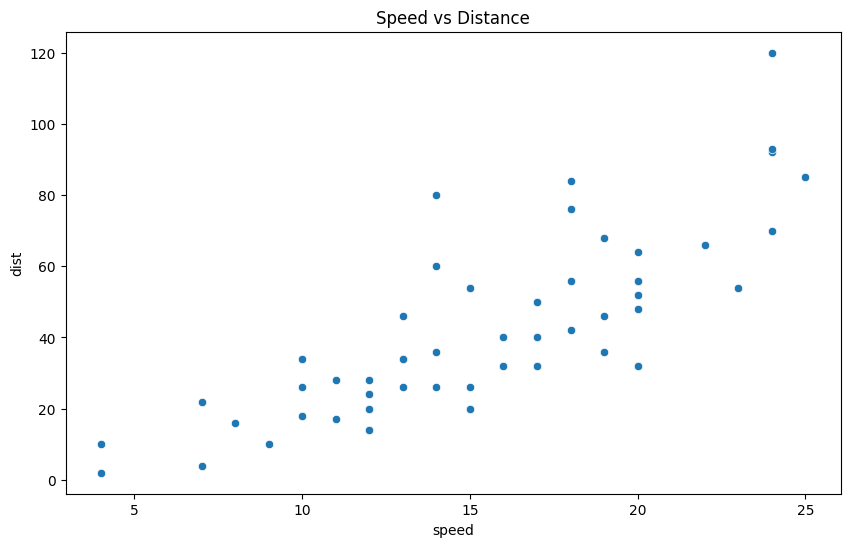

In [4]:
# Speed vs Distance Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='speed', y='dist')
plt.title('Speed vs Distance')
plt.show()

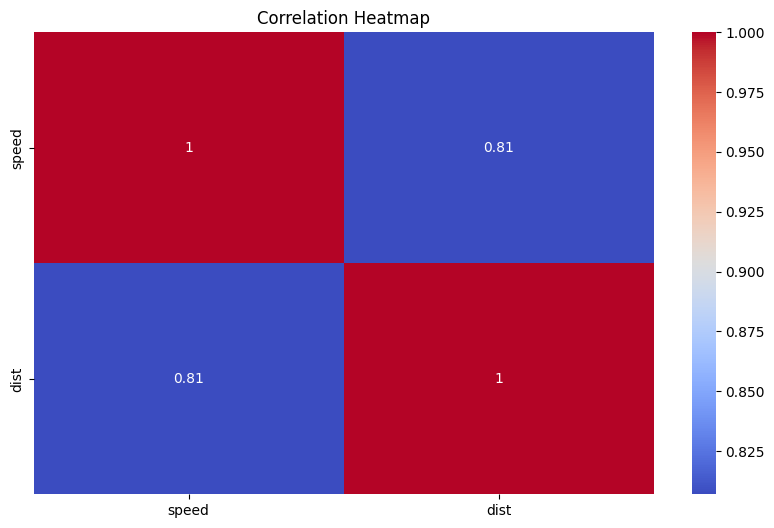

In [5]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 3. Preprocessing

In [6]:
X = df[['speed']]
y = df['dist']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Model Training: ElasticNet

ElasticNet combines L1 and L2 regularization.

In [7]:
model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
model.fit(X_train_scaled, y_train)

ElasticNet(random_state=42)

## 5. Prediction and Evaluation


In [8]:
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"--- ElasticNet Results ---")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Comparison with Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression R-squared: {r2_lr:.2f}")

--- ElasticNet Results ---
MAE: 13.09
MSE: 401.22
R-squared: 0.44
Linear Regression R-squared: 0.62
